In [2]:
from datetime import datetime
from pathlib import Path

import geopandas as gpd
import pandas as pd
from pandas_profiling import ProfileReport

In [3]:
input_data = Path("data/")

In [4]:
data = pd.read_csv("data/Waste_Collection___Diversion_Report__daily_.csv")
data['Report Date'] = data['Report Date'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y'))
data['Load Time'] = data['Load Time'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y %I:%M:%S %p'))
data['Load Weight'] = data['Load Weight'].apply(lambda x: float(str(x).replace(',', '')))

In [5]:
data.head()

,Report Date,Load Type,Load Time,Load Weight,Dropoff Site,Route Type,Route Number,Load ID
0,2020-12-08,BULK,2020-12-08 15:02:00,5220.0,TDS LANDFILL,BULK,BU13,899097
1,2020-12-08,RECYCLING - SINGLE STREAM,2020-12-08 10:00:00,11140.0,TDS - MRF,RECYCLING - SINGLE STREAM,RTAU53,899078
2,2020-12-03,RECYCLING - SINGLE STREAM,2020-12-03 10:34:00,10060.0,BALCONES RECYCLING,RECYCLING - SINGLE STREAM,RHBU10,899082
3,2020-12-07,SWEEPING,2020-12-07 10:15:00,7100.0,TDS LANDFILL,SWEEPER DUMPSITES,DSS04,899030
4,2020-12-07,RECYCLING - SINGLE STREAM,2020-12-07 16:00:00,12000.0,TDS - MRF,RECYCLING - SINGLE STREAM,RMAU53,899048


In [37]:
profile = ProfileReport(data, title="Waste Collection Report")
profile.to_file("waste_collection.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 106.57it/s]


In [6]:
# Garbage routes
routes = gpd.read_file(open("data/Garbage Routes.geojson"))

In [13]:
routes.head()

,rt_old,garb_day,landfill,garb_rt,super_num,op_type,garb_sup,geometry
0,None,Thursday,TDS,PAH83,697,Auto,Gilbert,"MULTIPOLYGON (((-97.70618 30.36742, -97.70723 ..."
1,PAM84,Monday,TDS,PAM54,500,Auto,Castillo,"MULTIPOLYGON (((-97.83237 30.16213, -97.83237 ..."
2,None,Monday,TDS,PAM71,596,Auto,Carnline,"MULTIPOLYGON (((-97.72977 30.19009, -97.72103 ..."
3,PAH75,Thursday,TDS,PAH54,500,Auto,Castillo,"MULTIPOLYGON (((-97.65374 30.26269, -97.65322 ..."
4,None,Wednesday,TDS,PAW71,596,Auto,Carnline,"MULTIPOLYGON (((-97.64683 30.38640, -97.64724 ..."


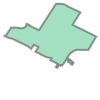

In [33]:
# routes.loc[2]['geometry']
routes.loc[5]['geometry']

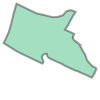

In [42]:
# routes.head()
routes[routes["garb_rt"] == "PAH83"]['geometry'][0]
# routes.crs

In [10]:
import folium